# Importing Packages

In [132]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier  # for KNN
from sklearn.linear_model import LinearRegression  # for Linear Regression
from sklearn.linear_model import Ridge  # for Ridge Regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.mixture import GaussianMixture

# importing Data

In [133]:
heart= pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [134]:
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# EDA

In [135]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [136]:
heart.isna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [137]:
for column in heart.columns:
    value_counts = heart[column].value_counts()
    print(f"Value counts for column '{column}':")
    print(value_counts)
    print("\n")

Value counts for column 'age':
age
60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
53.000    10
58.000    10
63.000     8
80.000     7
72.000     7
40.000     7
42.000     7
85.000     6
68.000     5
52.000     5
62.000     5
51.000     4
59.000     4
61.000     4
73.000     4
49.000     4
69.000     3
46.000     3
64.000     3
82.000     3
90.000     3
78.000     2
60.667     2
54.000     2
77.000     2
57.000     2
66.000     2
44.000     2
67.000     2
95.000     2
48.000     2
43.000     1
86.000     1
81.000     1
79.000     1
41.000     1
94.000     1
87.000     1
47.000     1
56.000     1
Name: count, dtype: int64


Value counts for column 'anaemia':
anaemia
0    170
1    129
Name: count, dtype: int64


Value counts for column 'creatinine_phosphokinase':
creatinine_phosphokinase
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: count, Length: 208, dtype: int64


<Axes: >

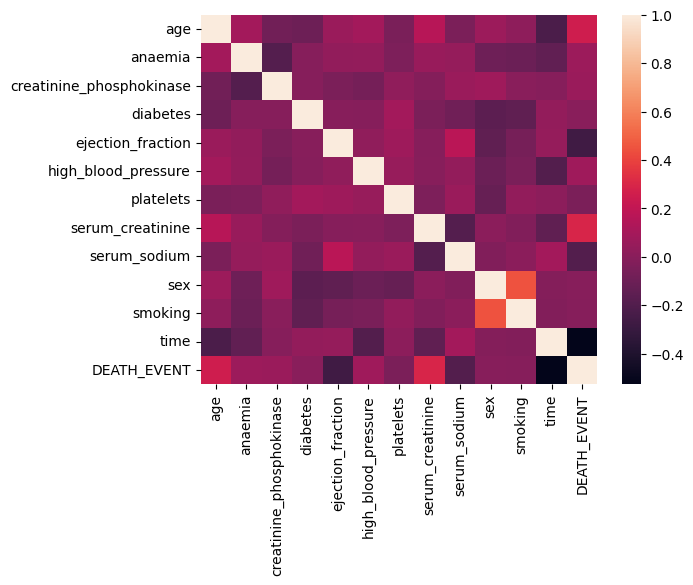

In [138]:
sns.heatmap(heart.corr())

# Task 1 Cluster analysis 

In [139]:
heartMinusDeath= heart.drop(columns='DEATH_EVENT')

In [140]:
heartMinusDeath

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [141]:
pca = PCA(n_components=2)  
pca_heartMinusDeath = pca.fit_transform(heartMinusDeath.to_numpy())

/Users/tutudaranijo/Downloads/School/Fall 2023/Deep Learning/Homework/AssigmentDeepLearning2/.conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tutudaranijo/Downloads/School/Fall 2023/Deep Learning/Homework/AssigmentDeepLearning2/.conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/tutudaranijo/Downloads/School/Fall 2023/Deep Learning/Homework/AssigmentDeepLearning2/.conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explici

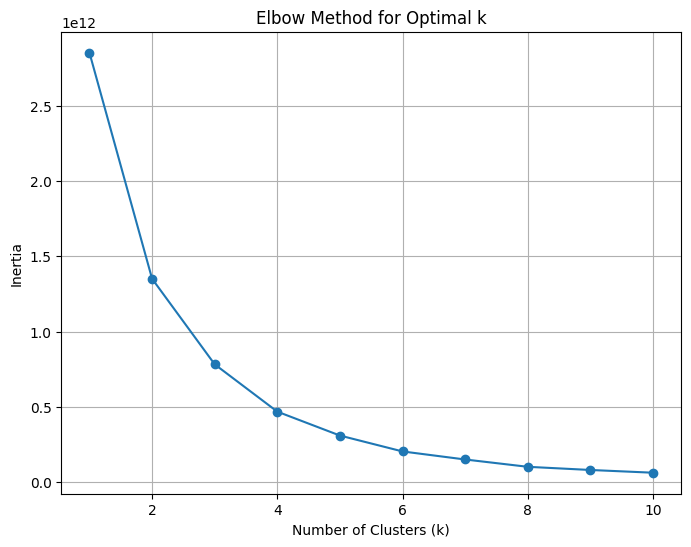

In [142]:
# optimal clusters
# elbow method
inertia = []


k_range = range(1, 11)


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_heartMinusDeath)
    inertia.append(kmeans.inertia_)

# Plot 
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

 K-Means 

In [143]:
k = 4 # number of clusters

# KMeans model
kmeans = KMeans(n_clusters=k, random_state=0)


kmeans.fit(pca_heartMinusDeath)

cluster_labels = kmeans.labels_


cluster_centers = kmeans.cluster_centers_


/Users/tutudaranijo/Downloads/School/Fall 2023/Deep Learning/Homework/AssigmentDeepLearning2/.conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


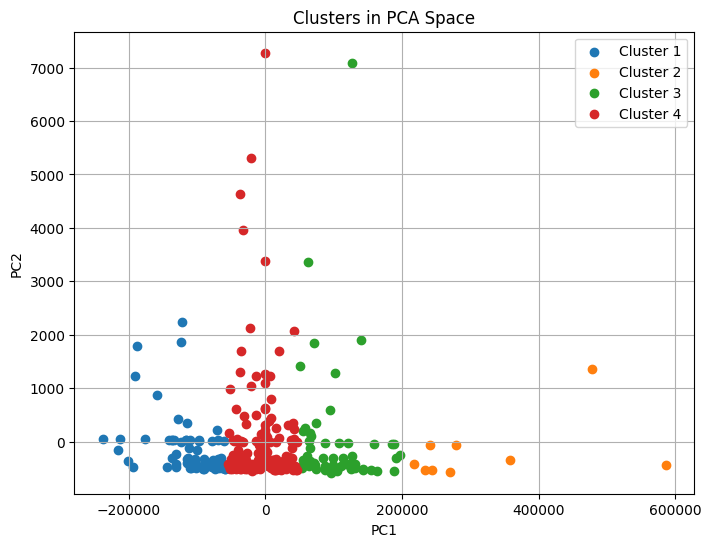

In [144]:
cluster_labels = kmeans.labels_

# Create a DataFrame to store the cluster labels
pca_heartMinusDeath_df = pd.DataFrame(data=pca_heartMinusDeath, columns=[f'PC{i}' for i in range(1, pca_heartMinusDeath.shape[1] + 1)])


pca_heartMinusDeath_df['Cluster'] = cluster_labels

# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(
        pca_heartMinusDeath_df[pca_heartMinusDeath_df['Cluster'] == cluster]['PC1'],
        pca_heartMinusDeath_df[pca_heartMinusDeath_df['Cluster'] == cluster]['PC2'],
        label=f'Cluster {cluster + 1}'
    )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters in PCA Space')
plt.legend()
plt.grid(True)
plt.show()

Kernel K-Means

In [145]:
pca_heartMinusDeath = pca.fit_transform(heartMinusDeath.to_numpy())
kernel_matrix = pairwise_kernels(pca_heartMinusDeath, metric="rbf",gamma=1)  

# Create a SpectralClustering model with the kernel matrix
spectral_clustering = SpectralClustering(n_clusters=4, affinity="precomputed", random_state=0)


cluster_labels = spectral_clustering.fit_predict(kernel_matrix)

/Users/tutudaranijo/Downloads/School/Fall 2023/Deep Learning/Homework/AssigmentDeepLearning2/.conda/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


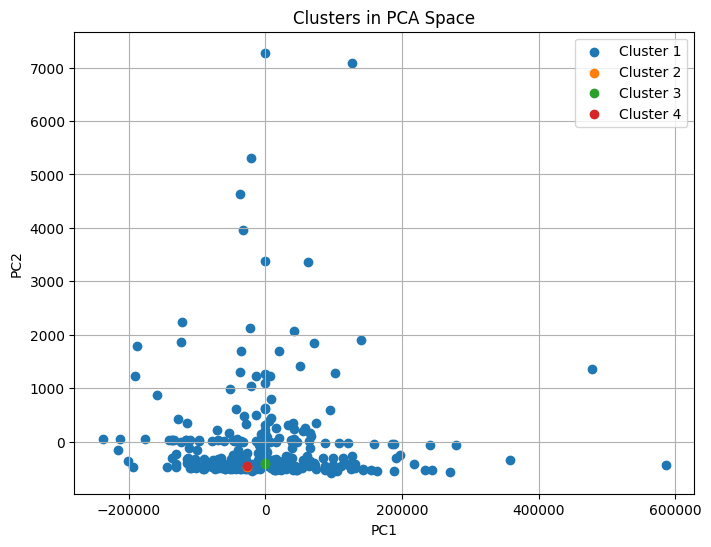

In [146]:

pca_heartMinusDeath_df = pd.DataFrame(data=pca_heartMinusDeath, columns=[f'PC{i}' for i in range(1, pca_heartMinusDeath.shape[1] + 1)])

pca_heartMinusDeath_df['Cluster'] = cluster_labels  


plt.figure(figsize=(8, 6))
for cluster in range(4):  
    plt.scatter(
        pca_heartMinusDeath_df[pca_heartMinusDeath_df['Cluster'] == cluster]['PC1'],
        pca_heartMinusDeath_df[pca_heartMinusDeath_df['Cluster'] == cluster]['PC2'],
        label=f'Cluster {cluster + 1}'
    )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters in PCA Space')
plt.legend()
plt.grid(True)
plt.show()

 Expectation Maximization (EM) clustering

In [147]:
X = pca.fit_transform(heartMinusDeath.to_numpy())

In [148]:
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X)


GaussianMixture(n_components=2, random_state=0)

In [149]:
cluster_labels = gmm.predict(X)

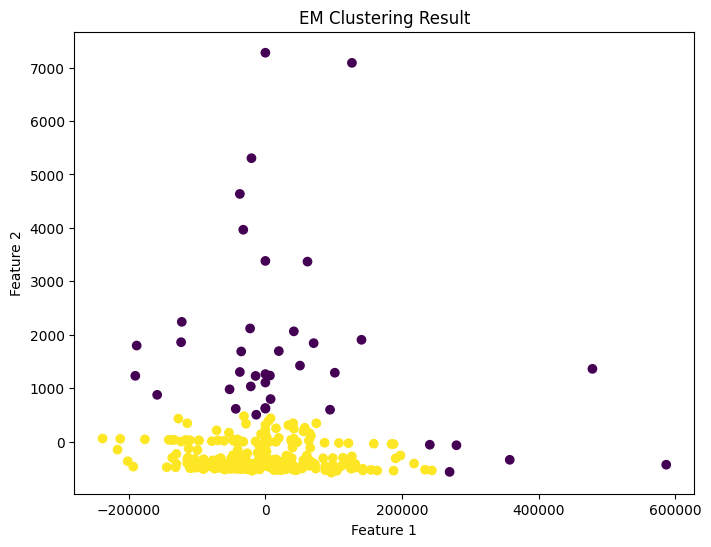

In [150]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM Clustering Result')
plt.show()

K- Means and did a good job of separating the data but none of them did a good job of actually grouping the death_event.
K-Means is like finding the center of each cluster (centroid) and assigning points to the nearest centroid. It repeats this process until the assignments don't change much.

Kernel K-Means
nstead of measuring distances in the original space, it transforms the data into a higher-dimensional space where it's easier to separate clusters

Expectation-Maximization (EM):
EM estimates the missing information, like which group a data point belongs to, and the shape of the clusters.

# Task 2 Regression

In [151]:
X = heartMinusDeath.to_numpy()
Y = heart['DEATH_EVENT'].to_numpy()


In [152]:
# train data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [153]:
# Linear Regression
linear_reg = LinearRegression()


linear_reg.fit(X_train, Y_train)


Y_pred_linear = linear_reg.predict(X_test)

In [154]:
#Ridge
ridge_reg = Ridge()


ridge_reg.fit(X_train, Y_train)


Y_pred_ridge = ridge_reg.predict(X_test)

In [155]:
mse_linear = mean_squared_error(Y_test, Y_pred_linear)
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Ridge Regression MSE: {mse_ridge}")

Linear Regression MSE: 0.15496066726292318
Ridge Regression MSE: 0.15494798111440064


Linear Regression:

Strengths:

Simplicity: Linear Regression is easy to understand and interpret. It provides straightforward insights into how each input feature influences the mortality prediction.
Transparency: The model's parameters (coefficients) have clear meanings, making it easy to explain to non-technical audiences.
Speed: Training and using a linear regression model is computationally efficient, making it suitable for large datasets.
Weaknesses:

Assumption of Linearity: Linear Regression assumes that the relationship between input features and mortality is linear. If the relationship is non-linear, the model may not perform well.
Overfitting: Linear Regression is prone to overfitting when you have many input features, some of which might not be relevant to mortality prediction.
Limited Complexity: Linear Regression might not capture complex relationships in the data, leading to suboptimal predictions.
Ridge Regression:

Strengths:

Regularization: Ridge Regression includes L2 regularization, which helps prevent overfitting. It can handle situations where there are many input features, some of which may not be very informative.
Stability: Ridge Regression tends to be more stable and robust, as it reduces the sensitivity to outliers in the data.
Improved Generalization: By adding a penalty term to the loss function, Ridge Regression often generalizes better and provides more reliable mortality predictions.
Weaknesses:

Complexity of Tuning: Ridge Regression requires selecting an optimal regularization strength (alpha parameter), which can be challenging to determine without cross-validation.
Slightly Reduced Interpretability: The introduction of regularization can make the interpretation of coefficients less straightforward compared to standard Linear Regression.
Limited Handling of Non-Linearity: While Ridge Regression is more robust to overfitting, it still assumes a linear relationship between features and mortality. It may not handle complex, non-linear relationships wel

# Task 3 Classification 

In [156]:
nb_model = GaussianNB()


nb_model.fit(X_train, Y_train)

Y_pred_nb = nb_model.predict(X_test)


In [157]:

# Calculate accuracy
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
print(f"Accuracy (Naive Bayes): {accuracy_nb:.2f}")


Accuracy (Naive Bayes): 0.77


In [158]:

# Get a classification report for additional metrics
classification_rep_nb = classification_report(Y_test, Y_pred_nb)
print("Classification Report (Naive Bayes):\n", classification_rep_nb)

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.73      0.97      0.84        37
           1       0.91      0.43      0.59        23

    accuracy                           0.77        60
   macro avg       0.82      0.70      0.71        60
weighted avg       0.80      0.77      0.74        60



In [159]:
knn_model = KNeighborsClassifier()


knn_model.fit(X_train, Y_train)


Y_pred_knn = knn_model.predict(X_test)


accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn:.2f}")

Accuracy (KNN): 0.48


In [160]:
classification_rep_knn = classification_report(Y_test, Y_pred_knn)
print("Classification Report (K-Nearest Neighbors):\n", classification_rep_knn)


Classification Report (K-Nearest Neighbors):
               precision    recall  f1-score   support

           0       0.57      0.68      0.62        37
           1       0.25      0.17      0.21        23

    accuracy                           0.48        60
   macro avg       0.41      0.42      0.41        60
weighted avg       0.45      0.48      0.46        60



In [161]:
# Create a confusion matrix
cm_knn = confusion_matrix(Y_test, Y_pred_knn)


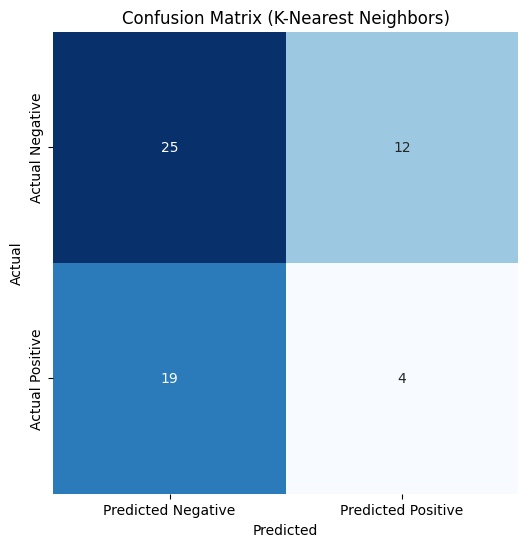

In [162]:

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (K-Nearest Neighbors)')
plt.show()


In [163]:

# Calculate ROC curve and AUC
Y_test_bin = label_binarize(Y_test, classes=[0, 1])
fpr, tpr, _ = roc_curve(Y_test_bin, knn_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)


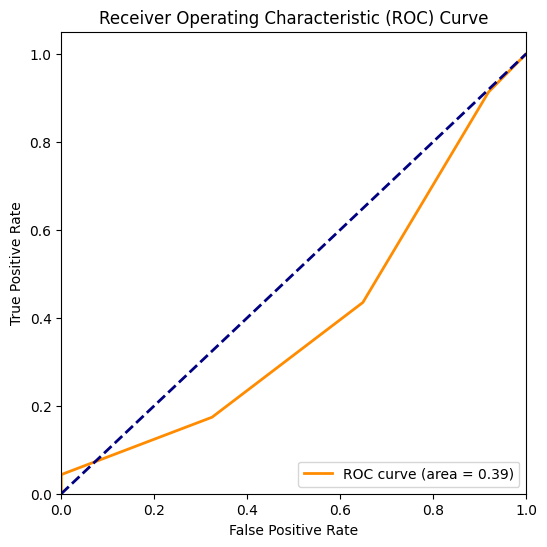

In [164]:

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Bayesian Classifier:
 Bayesian Classifier  uses evidence and past knowledge to make prediction.
Suitable when we have a good understanding of how risk factors work together and we want to combine that knowledge with new evidence.
It's like making predictions based on what we know and updating those predictions when we get new information.

Naive Bayes:
Naive Bayes as a simplified approach by making an assumption that all pieces of evidence are unrelated. 

k-Nearest Neighbors (K-NN):

K-NN as a method that groups patients who are similar to each other.

Did not predict postive rate well it is basically random guessing 

# Summary

The clinical relevance of these results is that different techniques can be applied to predict mortality in cardiovascular medicine, depending on the characteristics of the data and the desired level of interpretability. Linear and Ridge Regression are simple and suitable for straightforward relationships, while Bayesian and Naive Bayes methods can incorporate prior knowledge. Clustering methods like K-Means and Kernel K-Means can be used for data exploration and grouping. However, it's essential to evaluate the performance of each method in the specific clinical context to determine their effectiveness in mortality prediction.